In [4]:

import pandas as pd
import pingouin as pg
import seaborn as sns
from matplotlib import pyplot as plt
import os


import warnings
warnings.filterwarnings('ignore')


In [2]:
# read in csv file from experiment 2
raw = pd.read_csv('https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/Experiments/Experiment2/data/data.csv')

In [14]:
# some preprocessing

df = raw[raw['sender'] == 'Stimulus']                               # get only rows with RT data
df = df[df['correct'] == True]                                      # get only correct responses

data = df[['sender', 'url', 'duration', 'condition']].copy()        # get only the columns we need

data_agg = df.groupby(['url', 'condition'])['duration'].mean().reset_index()    # get aggregated data (RT means per participant per condition)
data_agg.head()

,url,condition,duration
0,2225,Filler,742.948000
1,2225,Nonword,704.715200
2,2225,Related,598.352455
3,2225,Unrelated,757.481125
4,2226,Filler,640.613000


<Axes: xlabel='condition', ylabel='duration'>

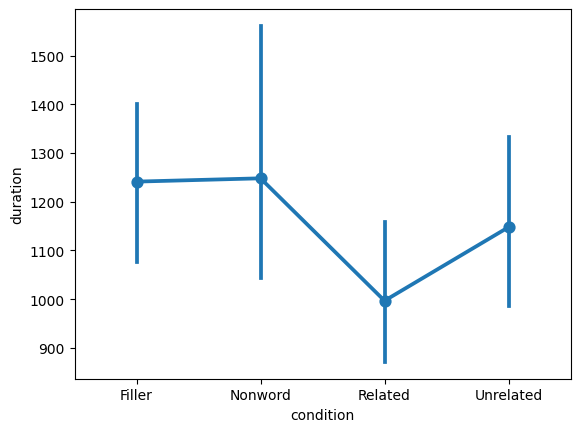

In [15]:
# inspect the data

sns.pointplot(data = data_agg, x='condition', y = 'duration')

In [16]:
# Remove filler trials
data_agg = data_agg[data_agg['condition'] != 'Filler']

<Axes: xlabel='condition', ylabel='duration'>

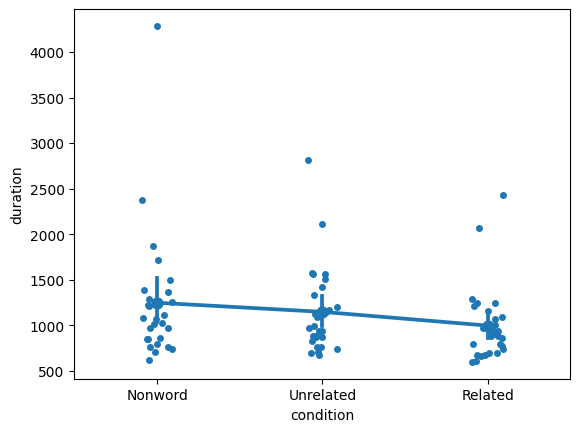

In [17]:
# Look at the means together with the actual datapoints
# plotting the means an individual data points
order = ['Nonword', 'Unrelated', 'Related']                                     # define the order we want the x-axis categories to have: 
sns.pointplot(data = data_agg, x='condition', y = 'duration', order=order)      # order: unrelated to related
sns.stripplot(data = data_agg, x='condition', y = 'duration', order=order)

<Axes: xlabel='condition', ylabel='duration'>

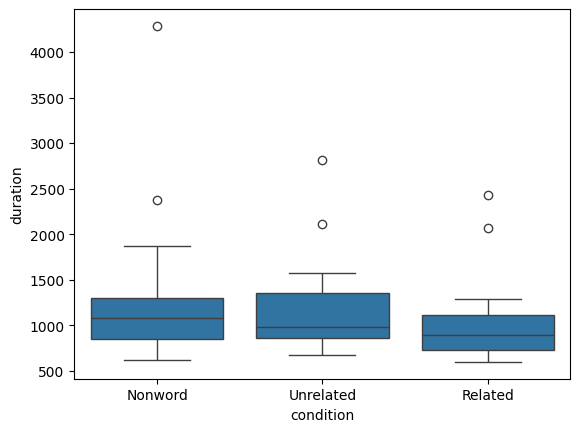

In [18]:
# we have too many outliers: makes the aactual data points seem indeferiental
# Remove outliers

# looking at boxplots is one way to identify outliers
sns.boxplot(data = data_agg, x='condition', y = 'duration', order=order)


In [29]:
# Seaborn uses interquartile range by default to find outliers. You can get the exact numbers like this:

Q1 = data_agg['duration'].quantile(0.25)
Q3 = data_agg['duration'].quantile(0.75)
    
IQR = Q3 - Q1

print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)
#finding the first (Q1) and third(Q3)quantile and multiplyting it by 1.5
print('Outliers:', Q1 - (1.5 * IQR), Q3 + (1.5 * IQR))

Q1: 796.3144155844159
Q3: 1250.7111053230788
IQR: 454.3966897386629
Outliers: 114.71938097642158 1932.3061399310732


<Axes: xlabel='condition', ylabel='duration'>

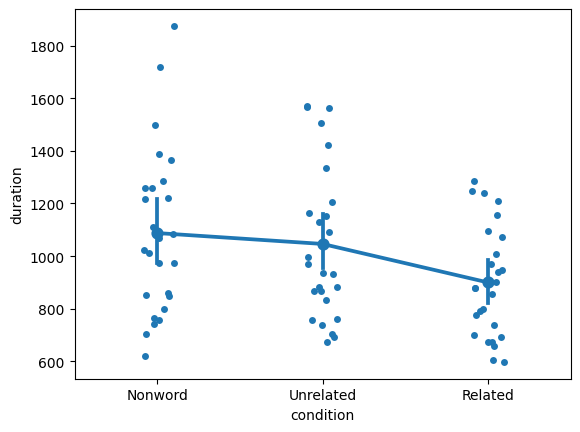

In [19]:
# get only RT's less than 2 seconds
#looks at dataframe and duration column and only includes values less than 2000
data_agg = data_agg[data_agg['duration'] < 2000]

order = ['Nonword', 'Unrelated', 'Related']
sns.pointplot(data = data_agg, x='condition', y = 'duration', order=order)
sns.stripplot(data = data_agg, x='condition', y = 'duration', order=order)

Our experiment 2 was based on the first experiment in:

Besner, D., Smith, M. C., & MacLeod, C. M. (1990). Visual word recognition: A dissociation of lexical and semantic processing. _Journal of Experimental Psychology: Learning, Memory, and Cognition, 16_(5), 862.

If we find the same results that they did, our results should look something like the results reported in their Table 1:

<img src="https://github.com/ethanweed/ExPsyLing/blob/master/Slides/Images/Besner%20et%20al_1990_Table%201.png?raw=true" width=""/>

In [21]:
# replicating the original experiment we calculate the RT of our own etc
related = round(data_agg[data_agg['condition'] == 'Related']['duration'].median())
unrelated = round(data_agg[data_agg['condition'] == 'Unrelated']['duration'].median())
nonwords = round(data_agg[data_agg['condition'] == 'Nonword']['duration'].median())

print('Related:', related)
print('Unrelated:', unrelated)
print('Nonwords:', nonwords)

Related: 879
Unrelated: 955
Nonwords: 1046


Mean RT

| Study               | Related | Unrelated | Nonwords |
|---------------------|---------|-----------|----------|
| Besner et al (1990) | 685     | 804       | 765      |
| ExPsyLing (2023)    | 879     | 955       | 1046     |

overall our reaction times are higher tha ntheirs, unrelated vs. related: our data correlates with theirs. Their participants where faster on the non words than unrelated and for us: We arte non-native speechers, follow all the phonotactic rules of English, harder to distinguish. The pseudowords may also be words in peoples own native languages

INCORROCET THE ORIGINAL EXPERIMENT DID THE MEDIAN AND THIS IS FOR THE MEAN

| Study               | R-U  | R-N  | U-N |
|---------------------|------|------|-----|
| Besner et al (1990) | -119 | -80  | 39  |
| ExPsyLing (2023)    | -146 | -188 | -42 |